# Human Resource Analytics

## Im [Shriya Prasad](https://www.linkedin.com/in/shriya-prasad). I recently graduated from the University of Texas - San Antonio, with a Master's in Computer Science. My concentration was Data Science. My capstone project is Human Resource Analytics.
## We know that in today's competitive world, employees are the main reason for a company's success. Thus every company needs an analysis of its Attrition Rates for it to sustain itself in the market. It is said that any healthy company has attrition rates of about 10%. Learning about attrition rates could help a lot for a company to retain its employees and have better customer employee relations. Using statistical analysis and Machine Learning techniques, we can find the attrition rates for a given company. 

### Importing libraries I have used Pandas, sklearn numpy, seaborn and matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier ,RandomForestClassifier
import seaborn as sns
import numpy as np
import re
from sklearn.metrics import roc_auc_score
import sklearn.model_selection as ms
from sklearn import metrics

## Dataset
### To perform the analysis I have a dataset consisting of multiple companies and attributes for each company such as "Salary", "Projects being handled", "Pros","Cons"," Job Title","Work Balance", "Culture Values" and "Career opportunities".  These attributes aid in our analysis and help us in understanding the most important factor for the employees to leave the company. The data set has about 67.5k entries. Each row specifies a different person working in a company. 

In [2]:
#import data
data = pd.read_csv("employee_reviews.csv")
df = data.iloc[:,1:]
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
#checking for null values
print(df.isnull().any()) 

company                       False
location                      False
dates                         False
job-title                     False
summary                        True
pros                          False
cons                          False
advice-to-mgmt                 True
overall-ratings               False
work-balance-stars            False
culture-values-stars          False
carrer-opportunities-stars    False
comp-benefit-stars            False
senior-mangemnet-stars        False
helpful-count                 False
link                          False
dtype: bool


In [4]:
#replacing values of companies for easier interpretation
df['company'] = df['company'].replace('google',1)
df['company'] = df['company'].replace('amazon',2)
df['company'] = df['company'].replace('facebook',3)
df['company'] = df['company'].replace('netflix',4)
df['company'] = df['company'].replace('apple',5)
df['company'] = df['company'].replace('microsoft',6)

In [5]:
#renaming columns for easier interpretation
df = df.rename(columns = {'overall-ratings':'ratings','helpful-count':'helpful','job-title' : 'title', 'advice-to-mgmt':'advicemgmt','work-balance-stars':'workbalance','culture-values-stars':'culturevalue','carrer-opportunities-stars':'careeropp','comp-benefit-stars':'compbenefit','senior-mangemnet-stars':'seniormgmt'})

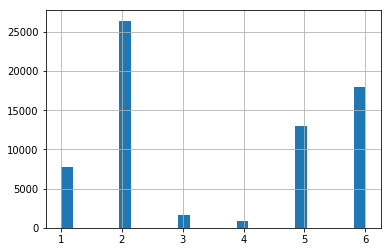

In [6]:
df['company'].hist(bins='auto')

### We shall consider a single company to see some visualizations and some Machine Learning Models

In [7]:
#consider only the company Google
dfg = df.loc[df['company'] == 1] 

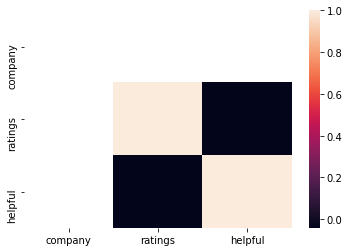

In [8]:
co = dfg.corr(method= 'pearson')
sns.heatmap(co)
plt.show()

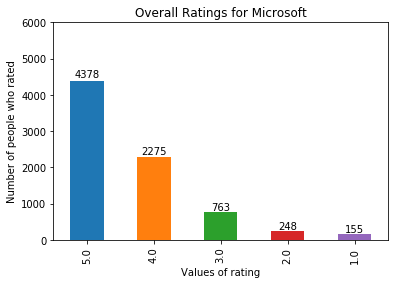

In [12]:
#overall ratings for the company
a = dfg.ratings.value_counts()  
b = [1,2,3,4,5] 
ax = a.plot(kind = 'bar')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
plt.ylim(0, 6000)
plt.ylabel('Number of people who rated')
plt.xlabel('Values of rating')
plt.title('Overall Ratings for Microsoft')
plt.show()

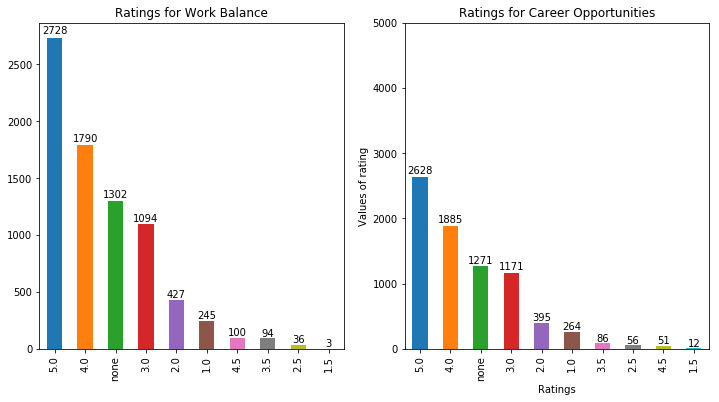

In [10]:
#work balance stars and career opportunities
fig, axs = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
a = dfg.workbalance.value_counts()
a1 = dfg.careeropp.value_counts()
bx = [0,1,1.5,2,2.5,3,3.5,4,4.5,5]
a.plot(ax = axs[0], kind = 'bar')
plt.ylim(0, 7000)
axs[0].set_title('Ratings for Work Balance')
plt.xlabel('Ratings')
plt.ylabel('Values of rating')
for rect in axs[0].patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
a1.plot(ax = axs[1], kind = 'bar')
axs[1].set_title('Ratings for Career Opportunities')
for rect in axs[1].patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
plt.ylim(0, 5000)
plt.xlabel('Ratings')
plt.ylabel('Values of rating')
plt.show()

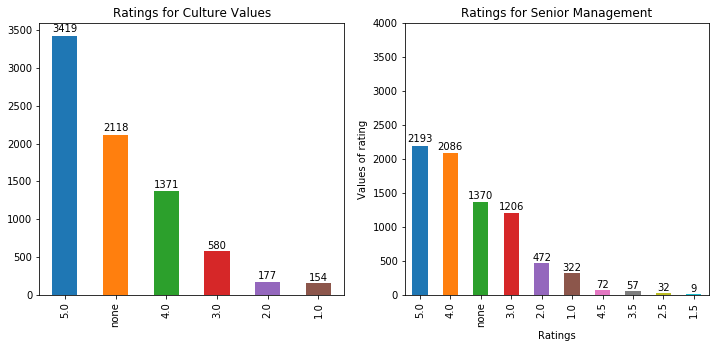

In [11]:
#culture Values and Senior Management Ratings
fig, axs = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
a = dfg.culturevalue.value_counts()
a1 = dfg.seniormgmt.value_counts()
bx = [0,1,1.5,2,2.5,3,3.5,4,4.5,5]
a.plot(ax = axs[0], kind = 'bar')
axs[0].set_title('Ratings for Culture Values')
plt.xlabel('Ratings')
plt.ylabel('Values of rating')
for rect in axs[0].patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
plt.ylim(0, 6000)
a1.plot(ax = axs[1], kind = 'bar')
axs[1].set_title('Ratings for Senior Management')
for rect in axs[1].patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
plt.ylim(0, 4000)
plt.xlabel('Ratings')
plt.ylabel('Values of rating')
plt.show()

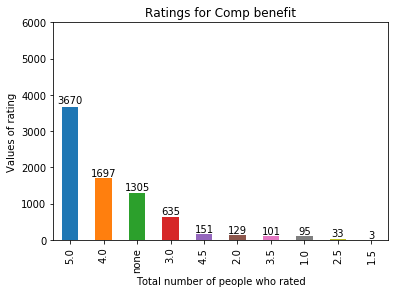

In [13]:
a = dfg.compbenefit.value_counts()
bx = [0,1,1.5,2,2.5,3,3.5,4,4.5,5]
#dfa = pd.DataFrame(a,bx)
ax = a.plot.bar()
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
plt.ylim(0, 6000)
plt.ylabel('Values of rating')
plt.xlabel('Total number of people who rated')
plt.title('Ratings for Comp benefit')
plt.show()

In [14]:
listtitle = list(dfg.title)
title = [str(e) for e in listtitle]
former = []
current = []
title = [word[0:16].strip() for word in title]
title = [word.replace('Former Employee', '0') for word in title]
title = [word.replace('Current Employee','1') for word in title]
title = [int(x) for x in title]

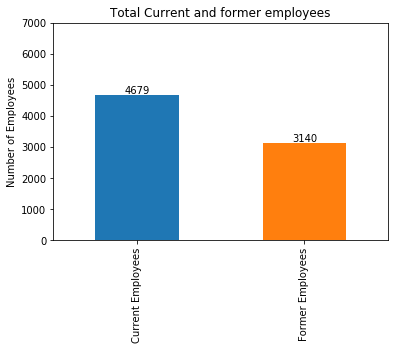

In [15]:
new_df = pd.DataFrame(title, columns=['column1'])
x = new_df.column1.value_counts()
ax = x.plot(kind = 'bar')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center') #, va='bottom')
plt.ylim(0, 7000)
ax.set_xticklabels(('Current Employees','Former Employees'))
plt.ylabel('Number of Employees')
plt.title('Total Current and former employees')
plt.show()

### The reviews for the company can be categorized into 4 kinds - Excellent/Best, Good, Medium, Bad and No Review

In [16]:
# This was categorized using regex
#best = 4; good = 3; medium = 2; bad = 1 ; na = 0
summary_list = list(dfg.summary)
summary_list = [str(x) for x in summary_list]
summary_list = [word.strip(" ") for word in summary_list]
bestwords = re.compile("Best|Great|Amazing|wonderful|Top|Dream|Incredible|Excellent|Love|Grrrreeeetttt|Exciting|Execellent|Genius|Exceeded|Exceeds|Awesome|Perfect|outstanding|dream|Surpasses|Surpassed",re.IGNORECASE)
goodwords = re.compile("Good|Geekland|Decent|Fun|Unique|NICE|Positive",re.IGNORECASE)
mediumwords = re.compile("OK|Average|Mixed\sBag",re.IGNORECASE)
badwords = re.compile("Burn\sout|Unethical|avoid|decline|Terrible|difficult|UGH|Disappointing|long\shours|Not\sgreat|too\slarge|bad|overrated|High\sstress|big\scompany\snow|Not\sperfect|meh|WTF|Golden\sHandcuffs*|Not\swhat\sit\sused\sto\sbe|crowded|Screwing|Not\sfor",re.IGNORECASE)
best_list = [x for x in summary_list if bestwords.findall(x)] #[x for x in summary_list if 'best' in summary_list]
new_summary = [x for x in summary_list if x not in best_list]
good_list = [x for x in new_summary if goodwords.findall(x)]
new_summary = [x for x in summary_list if x not in best_list and good_list]
medium_list = [x for x in new_summary if mediumwords.findall(x)]
new_summary = [x for x in summary_list if x not in best_list and good_list and medium_list]
bad_list = [x for x in new_summary if badwords.findall(x)]

In [17]:
def funrep(summary_list):
    for x in summary_list:
        if x in best_list:
            summary_list[summary_list.index(x)] = '4'
        elif x in good_list:
            summary_list[summary_list.index(x)] = '3'
        elif x in medium_list:
            summary_list[summary_list.index(x)] = '2'
        elif x in bad_list:
            summary_list[summary_list.index(x)] = '1'
        else:
            summary_list[summary_list.index(x)] = '0'

In [18]:
funrep(summary_list)

In [19]:
summary_list = [int(x) for x in summary_list]

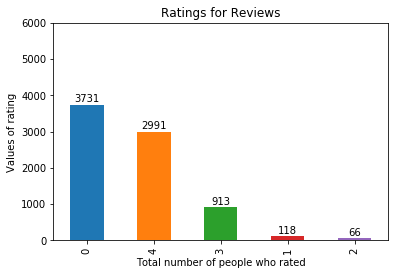

In [20]:
#plot
dfrev = pd.DataFrame(summary_list, columns= ['review'])
Z = dfrev.review.value_counts()
index=['Best','Good','medium','bad','no review']
ax = Z.plot(kind = 'bar')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
plt.ylim(0, 6000)
#ax.set_xticklabels(('No review','Best','Good','Bad','Medium'))
plt.ylabel('Values of rating')
plt.xlabel('Total number of people who rated')
plt.title('Ratings for Reviews')
plt.show()

In [21]:
# For better interpretation, use  the new titles and columns.
#print(len(dfrev) ,len(new_df)) #.head()
dfg['new_title'] = new_df['column1']
dfg['rev'] = dfrev['review']
dfg.head(2)

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,company,location,dates,title,summary,pros,cons,advicemgmt,ratings,workbalance,culturevalue,careeropp,compbenefit,seniormgmt,helpful,link,new_title,rev
0,1,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,1,4
1,1,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,0,1


In [22]:
dfg['ratings'].replace('none', 0, inplace=True)
dfg['workbalance'].replace('none', 0, inplace=True)
dfg['culturevalue'].replace('none', 0, inplace=True)
dfg['careeropp'].replace('none', 0, inplace=True)
dfg['compbenefit'].replace('none', 0, inplace=True)
dfg['seniormgmt'].replace('none', 0, inplace=True)

/opt/conda/envs/data3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Building Machine Learning Model and try finding out the most important features

In [23]:
X= dfg[['workbalance','culturevalue','careeropp','compbenefit','seniormgmt','rev']] #'ratings',
y = dfg['new_title']
X1 = X.iloc[:-1:]
y1 = y[:-1]

In [36]:
#Extra Tress Classifier
model = ExtraTreesClassifier(n_estimators=50,random_state=0)
model.fit(X1,y1)
predx = model.predict(X1)
print(metrics.classification_report(y1,predx))                             
precisionVal = metrics.precision_score(y1,predx)
print("Precision value", precisionVal)
recallVal = metrics.recall_score(y1,predx)
print("Recall value", recallVal)
f1Val = metrics.f1_score(y1,predx)
print("f1 value", f1Val)
KappaVal = metrics.cohen_kappa_score(y1, predx)
print("Kappa value", KappaVal)
Accuracy= metrics.accuracy_score(y1,predx)
print("Accuracy", Accuracy)

             precision    recall  f1-score   support

          0       0.73      0.45      0.56      3140
          1       0.71      0.89      0.79      4678

avg / total       0.72      0.71      0.69      7818

Precision value 0.7064220183486238
Recall value 0.8888413852073536
f1 value 0.7872018174933737
Kappa value 0.361377003202333
Accuracy 0.7124584292657968


Feature ranking with Extra trees Classifier:
1. feature 4 (0.202332)
2. feature 3 (0.190894)
3. feature 2 (0.190367)
4. feature 0 (0.168158)
5. feature 1 (0.133807)
6. feature 5 (0.114443)


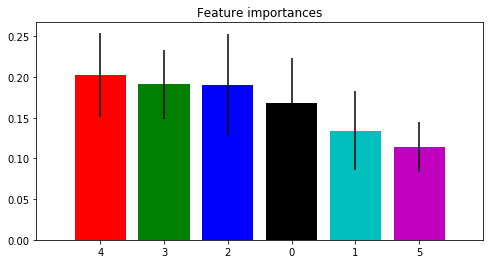

In [38]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking with Extra trees Classifier:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize= (8,4))
plt.title("Feature importances")
#legend = ['workbalance','culturevalue','careeropp','compbenefit','seniormgmt','reviews']
plt.bar(range(X.shape[1]), importances[indices], color="rgbkcm", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [34]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X1,y1)
featureimp = model.feature_importances_
predx = model.predict(X1)
print(metrics.classification_report(y1,predx))                                  
precisionVal = metrics.precision_score(y1,predx)
print("Precision value", precisionVal)
recallVal = metrics.recall_score(y1,predx)
print("Recall value", recallVal)
f1Val = metrics.f1_score(y1,predx)
print("f1 value", f1Val)
KappaVal = metrics.cohen_kappa_score(y1, predx)
print("Kappa value", KappaVal)
Accuracy= metrics.accuracy_score(y1,predx)
print("Accuracy", Accuracy)

             precision    recall  f1-score   support

          0       0.76      0.41      0.53      3140
          1       0.70      0.91      0.79      4678

avg / total       0.72      0.71      0.69      7818

Precision value 0.6981563060858215
Recall value 0.9147071398033347
f1 value 0.7918941426852966
Kappa value 0.3522967964358329
Accuracy 0.7123305193144026


Feature ranking with Random Forest:
1. feature 4 (0.204983)
2. feature 0 (0.188799)
3. feature 2 (0.173373)
4. feature 3 (0.172220)
5. feature 1 (0.141927)
6. feature 5 (0.118698)


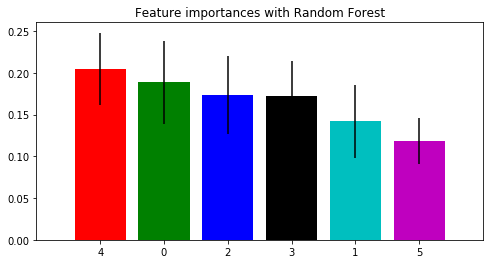

In [35]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking with Random Forest:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize= (8,4))
plt.title("Feature importances with Random Forest")
plt.bar(range(X.shape[1]), importances[indices],color="rgbkcm" , yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Conclusion

   Using Human Resource Analytics helps a company to make more important business decisions effectively. The HR Analytics shows the company as to what changes are required within the company for it to perform effectiely. Turning the HR data thta is aailable into an insight is a valuable and a strategic way for any company to take decisions without losing a lot of money and personnel. If we want to measure the impact of employee engagement on financial performance, we need to combine the company's annual engagement survey with its performance data. This way we can calculate the impact of engagement on the financial performance of different stores and departments. These insights can impact the way a business hires and may even help make tough decisions like changing its personnel.

From the above visualizations we can see that the despite the various <b>Reviews</b>, it is the feature which carries the last importance. The most important feature stays the same with different Machine Learning models. That is, the most important feature in both Extra Trees Classifier and Random Forest Classifier, we can see that <b>Senior Management</b> plays an important role in the attrition of this company. Also, the <b>Culture Value</b> in the company takes a second to last importance in both the models. We also see that the other features slightly change in their importances with the models.